## Fe-X alloy plots
Here, we plot the drag ratios from our calculations and compare with the SCMF results from Messina et. al.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
with h5py.File("../Fe-Cu_Ni_Si/Si_data.h5","r") as fl:
    keys = fl.keys()
    Temp = np.array(fl['Temp'])
    diff_aa_Si = np.array(fl['diff_aa'])
    diff_ab_Si = np.array(fl['diff_ab'])
    diff_bb_Si = np.array(fl['diff_bb'])
    diff_bb_Si_non_local = np.array(fl['diff_bb_nl'])
    drag_inf_Si = np.array(fl['drag_inf'])
    temp = np.array(fl['Temp']) # load the temperature.

with h5py.File("../Fe-Cu_Ni_Si/Cu_data.h5","r") as fl:
    keys = fl.keys()
    Temp = np.array(fl['Temp'])
    diff_aa_Cu = np.array(fl['diff_aa'])
    diff_ab_Cu = np.array(fl['diff_ab'])
    diff_bb_Cu = np.array(fl['diff_bb'])
    drag_inf_Cu = np.array(fl['drag_inf'])
    diff_bb_Cu_non_local = np.array(fl['diff_bb_nl'])

with h5py.File("../Fe-Mn/Mn_data.h5","r") as fl:
    keys = fl.keys()
    Temp = np.array(fl['Temp'])
    diff_aa_Mn = np.array(fl['diff_aa'])
    diff_ab_Mn = np.array(fl['diff_ab'])
    diff_bb_Mn = np.array(fl['diff_bb'])
    drag_inf_Mn = np.array(fl['drag_inf'])
    diff_bb_Mn_non_local = np.array(fl['diff_bb_nl'])
    
with h5py.File("../Fe-X-60-only/Cr_data.h5","r") as fl:
    keys = fl.keys()
    Temp = np.array(fl['Temp'])
    diff_aa_Cr = np.array(fl['diff_aa'])
    diff_ab_Cr = np.array(fl['diff_ab'])
    diff_bb_Cr = np.array(fl['diff_bb'])
    drag_inf_Cr = np.array(fl['drag_inf'])
    diff_bb_Cr_non_local = np.array(fl['diff_bb_nl'])
        
with h5py.File("../Fe-Cu_Ni_Si/Ni_data.h5","r") as fl:
    keys = fl.keys()
    Temp = np.array(fl['Temp'])
    diff_aa_Ni = np.array(fl['diff_aa'])
    diff_ab_Ni = np.array(fl['diff_ab'])
    diff_bb_Ni = np.array(fl['diff_bb'])
    drag_inf_Ni = np.array(fl['drag_inf'])
    diff_bb_Ni_non_local = np.array(fl['diff_bb_nl'])

In [3]:
# For Cu, Ni, Mn and Si, get the results with the 60-degree mechanism only.
with h5py.File("../Fe-X-60-only/Si_data.h5","r") as fl:
    diff_60_aa_Si = np.array(fl['diff_aa'])
    diff_60_ab_Si = np.array(fl['diff_ab'])
    diff_60_bb_Si = np.array(fl['diff_bb'])
    drag_inf_60_Si = np.array(fl['drag_inf'])
    diff_60_bb_Si_non_local = np.array(fl['diff_bb_nl'])

with h5py.File("../Fe-X-60-only/Cu_data.h5","r") as fl:
    diff_60_aa_Cu = np.array(fl['diff_aa'])
    diff_60_ab_Cu = np.array(fl['diff_ab'])
    diff_60_bb_Cu = np.array(fl['diff_bb'])
    drag_inf_60_Cu = np.array(fl['drag_inf'])
    diff_60_bb_Cu_non_local = np.array(fl['diff_bb_nl'])

with h5py.File("../Fe-X-60-only/Mn_data.h5","r") as fl:
    diff_60_aa_Mn = np.array(fl['diff_aa'])
    diff_60_ab_Mn = np.array(fl['diff_ab'])
    diff_60_bb_Mn = np.array(fl['diff_bb'])
    drag_inf_60_Mn = np.array(fl['drag_inf'])
    diff_60_bb_Mn_non_local = np.array(fl['diff_bb_nl'])
        
with h5py.File("../Fe-X-60-only/Ni_data.h5","r") as fl:
    diff_60_aa_Ni = np.array(fl['diff_aa'])
    diff_60_ab_Ni = np.array(fl['diff_ab'])
    diff_60_bb_Ni = np.array(fl['diff_bb'])
    drag_inf_60_Ni = np.array(fl['drag_inf'])
    diff_60_bb_Ni_non_local = np.array(fl['diff_bb_nl'])

In [4]:
# Load the SCMF results obtained from Messina et. al.'s database.
Drag_dat= {}
Xlist = ["Cr", "Ni", "Cu", "Si", "Mn"]
for X in Xlist:
    dat=[]
    with open("../SCMF_Messina_et_al/DragRatio_%s.dat"%(X),"r") as fl:
        for line in fl:
            arr = line.split()
            dat.append(float(arr[0]))
    Drag_dat[X] = np.array(dat)

In [5]:
temp = Temp/1000.
tempSpace = np.linspace(temp[0], temp[-1], 10, endpoint=True)

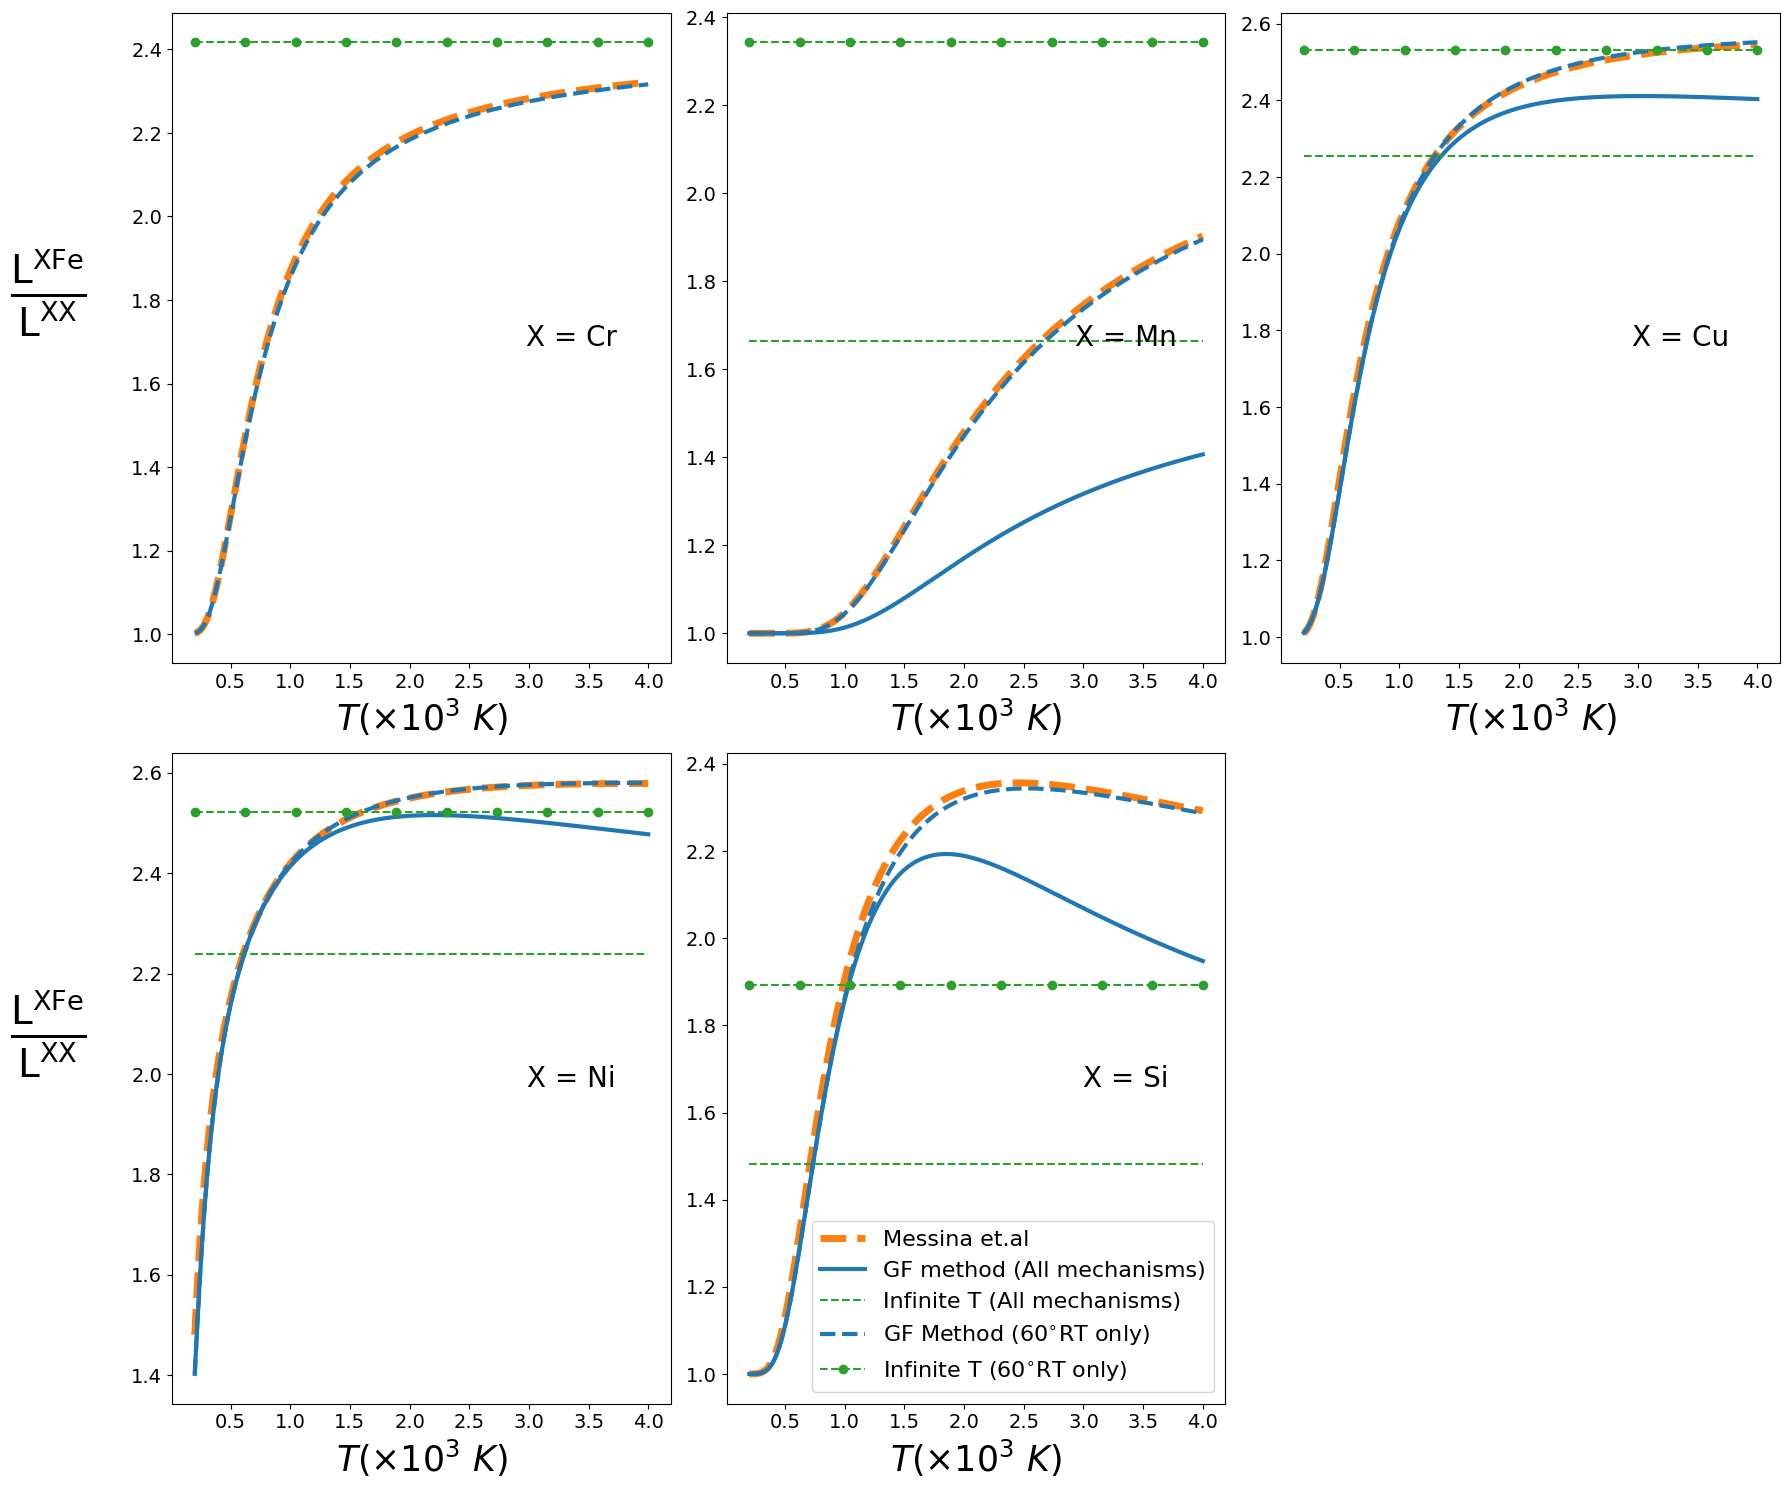

In [8]:
colorGF = "tab:blue"
colorMessina = "tab:orange"

colorInf = "tab:green"

infAll = "tab:green"
inf60 = infAll

lwMessina = 5
lwGF = 3

plt.figure(figsize=(18,15))

# Cr
plt.subplot(2,3,1)
plt.plot(temp, Drag_dat["Cr"], ls="--", color=colorMessina, lw=lwMessina)
plt.plot(temp, diff_ab_Cr/diff_aa_Cr, ls="--", color=colorGF, lw=lwGF)
plt.plot(tempSpace, np.ones_like(tempSpace) * drag_inf_Cr, ls='--', color=inf60, marker="o")
plt.xlabel(r'$T (\times 10^3 \ K)$', fontsize = 25)
plt.ylabel(r'$\mathrm{\frac{L^{XFe}}{L^{XX}}}$', rotation=0, labelpad = 60, fontsize = 40)
plt.text(0.8,0.5,"X = Cr", horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes,
        fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Mn
plt.subplot(2,3,2)
plt.plot(temp, Drag_dat["Mn"],ls='--', color=colorMessina, lw=lwMessina)
plt.plot(temp, diff_ab_Mn/diff_aa_Mn, color=colorGF, lw=lwGF)
plt.plot(temp, diff_60_ab_Mn/diff_60_aa_Mn, ls="--", color=colorGF, lw=lwGF)
plt.plot(temp, np.ones_like(temp) * drag_inf_Mn, color=infAll, ls="--")
plt.plot(tempSpace, np.ones_like(tempSpace) * drag_inf_60_Mn, ls='--', color=inf60, marker="o")
plt.xlabel(r'$T (\times 10^3 \ K)$', fontsize = 25)
plt.text(0.8,0.5,"X = Mn", horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Cu
plt.subplot(2,3,3)
plt.plot(temp, Drag_dat["Cu"],ls='--', color=colorMessina, lw=lwMessina)
plt.plot(temp, diff_ab_Cu/diff_aa_Cu, color=colorGF, lw=lwGF)
plt.plot(temp, diff_60_ab_Cu/diff_60_aa_Cu, ls="--", color=colorGF, lw=lwGF)
plt.plot(temp, np.ones_like(temp) * drag_inf_Cu, color=infAll, ls="--")
plt.plot(tempSpace, np.ones_like(tempSpace) * drag_inf_60_Cu, ls='--', color=inf60, marker="o")
plt.xlabel(r'$T (\times 10^3 \ K)$', fontsize = 25)
plt.text(0.8,0.5,"X = Cu", horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ni
plt.subplot(2,3,4)
plt.plot(temp, Drag_dat["Ni"],ls='--', color=colorMessina, lw=lwMessina)
plt.plot(temp, diff_ab_Ni/diff_aa_Ni, color=colorGF, lw=lwGF)
plt.plot(temp, diff_60_ab_Ni/diff_60_aa_Ni, ls="--", color=colorGF, lw=lwGF)
plt.plot(temp, np.ones_like(temp) * drag_inf_Ni, ls='--', color=infAll)
plt.plot(tempSpace, np.ones_like(tempSpace) * drag_inf_60_Ni, ls='--', color=inf60, marker="o")
plt.xlabel(r'$T (\times 10^3 \ K)$', fontsize = 25)
plt.ylabel(r'$\mathrm{\frac{L^{XFe}}{L^{XX}}}$', rotation=0, labelpad = 60, fontsize = 40)
plt.text(0.8,0.5,"X = Ni", horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Si
plt.subplot(2,3,5)

plt.plot(temp, Drag_dat["Si"],ls='--', color=colorMessina, lw=lwMessina, label="Messina et.al")
plt.plot(temp, diff_ab_Si/diff_aa_Si, color=colorGF, lw=lwGF, label="GF method (All mechanisms)")
plt.plot(temp, np.ones_like(temp) * drag_inf_Si, color=infAll, ls='--', label="Infinite T (All mechanisms)")
plt.plot(temp, diff_60_ab_Si/diff_60_aa_Si, ls="--", color=colorGF, lw=lwGF,
         label="GF Method ("+r'$60^{\circ}$RT'+" only)")
plt.plot(tempSpace, np.ones_like(tempSpace) * drag_inf_60_Si, ls='--', marker = "o",
         color=inf60, label="Infinite T ("+r'$60^{\circ}$RT'+" only)")
plt.xlabel(r'$T (\times 10^3 \ K)$', fontsize = 25)
plt.text(0.8,0.5,"X = Si", horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes,
        fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("Drag_FeX.pdf", bbox_inches="tight", format="pdf")
# plt.savefig("Drag_FeX.png", bbox_inches="tight", format="png")
# plt.savefig("Drag_FeX.eps", bbox_inches="tight", format="eps")